# CAVlib examples

Here's a program that calculates the CAV score for a few images on your computer:

In [6]:
from pathlib import Path
from cavlib import CAV

images_dir = Path('images')
my_cav = CAV.load('roundness.cav')

for image in images_dir.iterdir():
    print(image.name, my_cav.score(image))

fluid.png -0.011896367701601468
pluto.png 0.1423918228694583
saturn.png 0.04388165495449875
eclipse.png 0.1787881281410668
mars-surface.png -0.034688757654202665


Here's a program that searches a folder of images for the top 3 according a CAV:

top 3 images: [PosixPath('images/eclipse.png'), PosixPath('images/pluto.png'), PosixPath('images/saturn.png')]


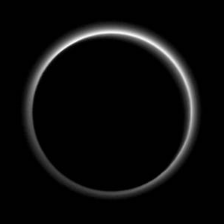

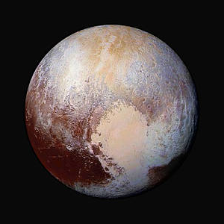

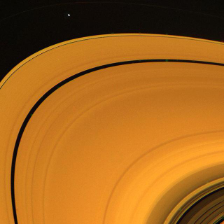

In [9]:
from pathlib import Path
from cavlib import CAV

images_dir = Path('images')
image_files = list(images_dir.iterdir())

my_cav = CAV.load('roundness.cav')
sorted_images = my_cav.sort(image_files, reverse=True)

print('top 3 images:', sorted_images[0:3])

from IPython.display import Image 

for image in sorted_images[0:3]:
    display(Image(image))

Or here's a program that takes a CAV from CAVstudio and runs it on a live video feed from your webcam:

In [ ]:
!pip install opencv-python

import cv2
from cavlib import CAV
from IPython import display

webcam = cv2.VideoCapture(1)
my_cav = CAV.load('roundness.cav')

display.clear_output()

while True:
    _, frame = webcam.read()
    print(my_cav.score(frame), end='\r')
    cv2.imshow('webcam', frame)
    cv2.waitKey(1)
    
# Note: restart kernel to stop video stream